## Loading library

In [3]:
from pydeseq2.dds import DeseqDataSet
from pydeseq2.ds import DeseqStats
import pandas as pd
import numpy as np

## Define filters and Group

Define the group which is bassically categorize the parameter you want to investigate by doing DEG here you need to define which parameter you want to investigte.

In [4]:
filtering = {'Time point': ["4mo"], #c("12mo"),
                'Sex': ["F"], #c("M"),
                'Group': ['5xFADWT', '5xFADHEMI']}
group = 'Group'

## Read the data
you should have to prepare two data:

1. count matrix on polyA genes
2. metadata (with the same order of data set 1)

In [5]:
datExpr = pd.read_csv("data/countMatrix_sorted_polyA.csv", index_col=0)
datExpr.head()

,gene_name,gene_type,hipp_F_5xFADHEMI_4mo_B1_11616_S17_rsem.genes.results,hipp_F_5xFADHEMI_4mo_B1_11626_S19_rsem.genes.results,hipp_F_5xFADHEMI_4mo_B2_11617_S38_rsem.genes.results,hipp_F_5xFADHEMI_4mo_B1_11625_S18_rsem.genes.results,hipp_F_5xFADHEMI_4mo_B1_11615_S16_rsem.genes.results,hipp_F_5xFADHEMI:Bin1HO_4mo_B2_13019_S32_rsem.genes.results,hipp_F_5xFADHEMI:Bin1HO_4mo_B1_13020_S1_rsem.genes.results,hipp_F_5xFADHEMI:Bin1HO_4mo_B2_13048_S35_rsem.genes.results,...,hipp_M_5xFADWT_12mo_B1_12419_S3_rsem.genes.results,hipp_M_5xFADWT_12mo_B2_12434_S34_rsem.genes.results,hipp_M_5xFADWT_12mo_B2_12421_S25_rsem.genes.results,hipp_M_5xFADWT_12mo_B1_12434_S19_rsem.genes.results,hipp_M_5xFADWT_12mo_B1_12429_S10_rsem.genes.results,hipp_M_5xFADWT:Bin1HO_12mo_B1_12976_S2_rsem.genes.results,hipp_M_5xFADWT:Bin1HO_12mo_B1_13013_S12_rsem.genes.results,hipp_M_5xFADWT:Bin1HO_12mo_B2_13018_S44_rsem.genes.results,hipp_M_5xFADWT:Bin1HO_12mo_B2_13012_S24_rsem.genes.results,hipp_M_5xFADWT:Bin1HO_12mo_B2_13017_S30_rsem.genes.results
ENSMUSG00000000001.4,Gnai3,protein_coding,327.0,237.0,363.0,363.0,325.0,425.0,279.0,512.0,...,455.0,473.0,562.0,170.0,352.0,530.0,346.0,474.0,561.0,444.0
ENSMUSG00000000003.15,Pbsn,protein_coding,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ENSMUSG00000000028.15,Cdc45,protein_coding,12.0,7.0,10.0,17.0,14.0,18.0,10.0,19.0,...,21.0,19.0,40.0,4.0,24.0,39.0,8.0,27.0,28.0,23.0
ENSMUSG00000000031.16,H19,lincRNA,5.0,1.0,4.0,0.0,0.0,1.0,1.0,0.0,...,2.0,2.0,0.0,1.0,2.0,3.0,1.0,2.0,2.0,1.0
ENSMUSG00000000037.16,Scml2,protein_coding,5.0,9.0,6.0,11.0,11.0,9.0,12.0,9.0,...,3.0,10.0,7.0,4.0,0.0,4.0,2.0,6.0,10.0,7.0


for each comparison, you need to repeat this part

## Subset data
if you want to only consider subset of samples instead of whole you should remove those samples from count matrix In this part of the code, you will keep the information about those samples that you care about it!

In [6]:
datTraits = pd.read_csv("data/experimentList_sorted.csv", index_col=0)
datTraits.Group.unique()

array(['5xFADHEMI', '5xFADHEMI:Bin1HO', '5xFADWT', '5xFADWT:Bin1HO'],
      dtype=object)

In [7]:
datTraits_selected = datTraits.copy(deep=True)
for col in filtering.keys():
    datTraits_selected = datTraits_selected[datTraits_selected[col].isin(filtering[col])]

datTraits_selected.index = datTraits_selected['file name']
datExpr_selected = datExpr.loc[:, datTraits_selected['file name']]
datExpr_selected[datExpr_selected.columns] = datExpr_selected[datExpr_selected.columns].astype(int)

## Run PyDESeq2

In [8]:
dds = DeseqDataSet(
    counts=datExpr_selected.T,
    metadata=datTraits_selected,
    design_factors=group,
    refit_cooks=True,
    n_cpus=8,
)
dds.deseq2()
stat_res = DeseqStats(dds, 
                      contrast=[group] + filtering[group])
stat_res.summary()

Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 3.01 seconds.

Fitting dispersion trend curve...
... done in 4.31 seconds.

Fitting MAP dispersions...
... done in 3.33 seconds.

Fitting LFCs...
... done in 1.92 seconds.

Refitting 0 outliers.

Running Wald tests...
... done in 1.14 seconds.

Log2 fold change & Wald test p-value: Group 5xFADWT vs 5xFADHEMI


,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
ENSMUSG00000000001.4,330.477503,0.084348,0.107727,0.782974,0.433642,0.816864
ENSMUSG00000000003.15,0.000000,NaN,NaN,NaN,NaN,NaN
ENSMUSG00000000028.15,12.707052,0.291783,0.449029,0.649810,0.515815,0.856392
ENSMUSG00000000031.16,1.875836,-0.411661,1.453375,-0.283245,0.776989,NaN
ENSMUSG00000000037.16,9.033730,0.222155,0.533315,0.416556,0.677003,0.918715
...,...,...,...,...,...,...
ENSMUSG00000118379.1,0.000000,NaN,NaN,NaN,NaN,NaN
ENSMUSG00000118383.1,8.685348,-0.238455,0.536844,-0.444180,0.656913,0.912100
ENSMUSG00000118384.1,0.000000,NaN,NaN,NaN,NaN,NaN
ENSMUSG00000118387.1,0.000000,NaN,NaN,NaN,NaN,NaN


In [9]:
annot = pd.read_csv("../genelist.vM21.annotation.tsv", index_col=0, sep="\t")
df = stat_res.results_df.copy(deep=True)
df.dropna(axis=0, inplace=True)
annot = pd.concat([df, annot], axis=1)
df = annot.loc[df.index, :]

In [10]:
df['DE'] = "No"
df.DE[np.logical_and(df.padj < 0.05, df.log2FoldChange > 0)] = "Up"
df.DE[np.logical_and(df.padj < 0.05, df.log2FoldChange < 0)] = "Down"

/var/folders/26/90_v4ll95wjdp9l6g2lxlm8r0000gn/T/ipykernel_21856/518674108.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.DE[np.logical_and(df.padj < 0.05, df.log2FoldChange > 0)] = "Up"
/var/folders/26/90_v4ll95wjdp9l6g2lxlm8r0000gn/T/ipykernel_21856/518674108.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.DE[np.logical_and(df.padj < 0.05, df.log2FoldChange < 0)] = "Down"


In [11]:
# save table
df.to_csv(f"pyDEG/{'_'.join(filtering['Time point'])}_{'_'.join(filtering['Sex'])}_{'_'.join(filtering['Group'])}.csv")

/var/folders/26/90_v4ll95wjdp9l6g2lxlm8r0000gn/T/ipykernel_21856/1702615961.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.label[df.DE == "No"] = ""
/var/folders/26/90_v4ll95wjdp9l6g2lxlm8r0000gn/T/ipykernel_21856/1702615961.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  down.sort_values(["padj"], inplace=True)
/var/folders/26/90_v4ll95wjdp9l6g2lxlm8r0000gn/T/ipykernel_21856/1702615961.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

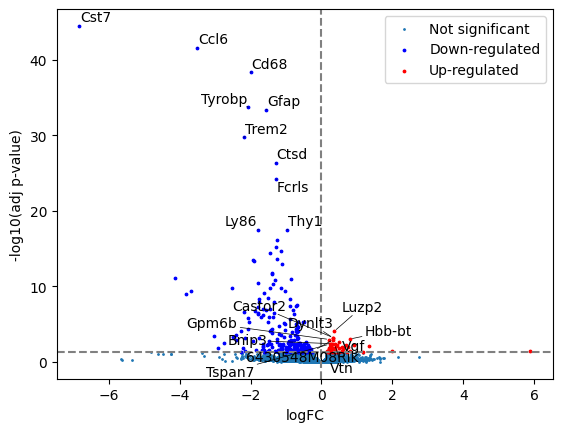

In [12]:
from adjustText import adjust_text
import matplotlib.pylab as plt

df['label'] = df.gene_name
df.label[df.DE == "No"] = ""

plt.scatter(x=df['log2FoldChange'],y=df['padj'].apply(lambda x:-np.log10(x)), s=1, label="Not significant")

# highlight down- or up- regulated genes
down = df[df.DE == "Down"]
down.sort_values(["padj"], inplace=True)
up = df[df.DE == "Up"]
up.sort_values(["padj"], inplace=True)

plt.scatter(x=down['log2FoldChange'],y=down['padj'].apply(lambda x:-np.log10(x)),s=3,label="Down-regulated",color="blue")
plt.scatter(x=up['log2FoldChange'],y=up['padj'].apply(lambda x:-np.log10(x)),s=3,label="Up-regulated",color="red")
texts=[]
for i in range(min(10, up.shape[0])):
    texts.append(plt.text(x=up.iloc[i, 1], 
                          y=-np.log10(up.iloc[i, 5]),
                          s=up.iloc[i, 6]))
for i in range(min(10, down.shape[0])):
    texts.append(plt.text(x=down.iloc[i, 1], 
                          y=-np.log10(down.iloc[i, 5]),
                          s=down.iloc[i, 6]))
adjust_text(texts,arrowprops=dict(arrowstyle="-", color='black', lw=0.5))
plt.xlabel("logFC")
plt.ylabel("-log10(adj p-value)")
plt.axvline(0,color="grey",linestyle="--")
plt.axhline(-np.log10(0.05),color="grey",linestyle="--")
plt.legend()

plt.savefig(f"pyDEG/{'_'.join(filtering['Time point'])}_{'_'.join(filtering['Sex'])}_{'_'.join(filtering['Group'])}.pdf")
plt.show()